In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

mpl.rcParams['font.family'] = 'Malgun Gothic' # windows 맑은 고딕 한글 설정
mpl.rcParams['font.size'] = 13
mpl.rcParams['axes.unicode_minus'] = False

# 분석 그래프 1

In [ ]:
df1= pd.read_csv("C:/Users/rlawl/Downloads/도로교통공단_가해운전자 차량용도별 월별 교통사고 통계_20211231.csv",encoding= 'CP949' )

In [ ]:
df1

In [ ]:
df1['가해자차량용도대분류'].unique()

In [ ]:
df1 = df1[df1['가해자차량용도대분류']=='이륜차']

In [ ]:
df1.reindex()

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(df1['발생월'],df1['사고건수'],marker = 'o', linestyle = '--',color = 'b',mfc ='c')
plt.xticks(range(1,13))
plt.xlabel('발생월')
plt.ylabel('사고건수')
plt.grid()

# 분석 그래프2


In [ ]:
df2= pd.read_csv("C:/Users/rlawl/Downloads/국민건강보험공단_건강검진정보_20211229.csv",encoding= 'CP949' )

In [ ]:
df2 = df2.iloc[0:10000]

In [ ]:
df2['기준년도'].unique()

In [ ]:
df2.columns

In [ ]:
ax = plt.figure(figsize = (10,5))
ax= sns.stripplot(data=df2, x="체중(5Kg 단위)", y="허리둘레", hue="성별코드", jitter = 0.25)
handles, labels  =  ax.get_legend_handles_labels()

ax.legend(handles, ['남성', '여성'], loc='lower right')

# 분석그래프 3

In [ ]:
df3= pd.read_csv("C:/Users/rlawl/Downloads/국민건강보험공단_건강검진정보_20211229.csv",encoding= 'CP949' )

In [ ]:
df3 = df3.dropna(axis=0)

In [ ]:
df3 = df3[[ '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레','수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피']]

In [ ]:
df3

In [ ]:
corr= df3.corr()

In [ ]:
plt.figure(figsize =(30,27))
mpl.rc('font',size=25)
sns.heatmap(corr, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdBu',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

# 분석그래프 4.

In [ ]:
df4= pd.read_csv("C:/Users/rlawl/Downloads/국민건강보험공단_건강검진정보_20211229.csv",encoding= 'CP949' )
df4 = df4.dropna(axis=0)

In [ ]:
df4

In [ ]:
df4 = df4[[ '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '흡연상태', '음주여부']]

In [ ]:
df4

In [ ]:
plt.boxplot(df4['LDL 콜레스테롤'])

In [ ]:
x= df4[df4['총 콜레스테롤']== df4['트리글리세라이드']/5+ df4['HDL 콜레스테롤']+df4['LDL 콜레스테롤']]

In [ ]:
x

In [ ]:
plt.boxplot(x['총 콜레스테롤'])

In [ ]:
plt.figure(figsize =(15,10))
mpl.rc('font',size=25)

plt.hist(x['총 콜레스테롤'],bins= 70, alpha = 0.5)
plt.hist(x['트리글리세라이드'],bins= 70,alpha = 0.5)
plt.hist(x['HDL 콜레스테롤'],bins= 70,alpha = 0.5)
plt.hist(x['LDL 콜레스테롤'],bins= 70,alpha = 0.5)

plt.show()

In [ ]:
fig,ax = plt.subplots(figsize=(15,10))
mpl.rc('font',size =15)

sns.kdeplot(data = x, x='총 콜레스테롤',label='총 콜레스테롤',bw_adjust=0.5,lw= 3)
sns.kdeplot(data = x, x='트리글리세라이드',label='트리글리세라이드',bw_adjust=0.5,lw= 3)
sns.kdeplot(data = x, x='HDL 콜레스테롤',label='HDL 콜레스테롤',bw_adjust=0.5,lw= 3)
sns.kdeplot(data = x, x='LDL 콜레스테롤',label='LDL 콜레스테롤',bw_adjust=0.5,lw= 3)
plt.xlabel('콜레스테롤 수치(mg/dL)')
plt.legend()

# 분석 그래프 5

In [2]:
import folium

In [4]:
df5= pd.read_csv("C:/Users/rlawl/Downloads/한국전력공사_전기차충전소위경도_20220718.csv",encoding= 'utf-8' )

In [18]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4778 entries, 0 to 4777
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도      4778 non-null   object 
 1   충전소명    4778 non-null   object 
 2   경도      4777 non-null   float64
 3   위도      4777 non-null   float64
dtypes: float64(2), object(2)
memory usage: 149.4+ KB


In [22]:
df5 = df5.dropna(axis=0)

In [31]:
df5_pivot = pd.pivot_table(df5, index='시도', values='충전소명', aggfunc='count')
df5_pivot

충전소명
시도           
강원도       267
경기도       901
경상남도      432
경상북도      375
광주광역시     119
대구광역시     258
대전광역시     142
부산광역시     185
서울특별시     631
세종특별자치시    73
울산광역시      57
인천광역시     194
전라남도      272
전라북도      215
제주특별자치도   228
충청남도      215
충청북도      213

In [28]:
lat = df5['경도'].mean()
long = df5['위도'].mean()
m = folium.Map([lat, long], zoom_start=7)
m

In [25]:
for i in df5.index:
    sub_lat = df5.loc[i, '경도']
    sub_long = df5.loc[i, '위도']
    
    title = df5.loc[i, '충전소명']
    
    #지도에 데이터 찍어서 보여주기
    folium.Circle([sub_lat, sub_long],color ='blue',radius= 4, tooltip = title).add_to(m)
    
m.save('전기차 충전소.html')
m

In [33]:
import json


geo_path = 'TL_SCCO_CTPRVN.json'
geo_str = json.load(open(geo_path,encoding='utf-8'))

geo_str

{'type': 'FeatureCollection',
 'bbox': [124.7893155286271,
  33.172610584346295,
  130.96524575425667,
  38.54255349620522],
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[128.54880989370014, 38.301950820518755],
      [128.5600921732829, 38.25735515107489],
      [128.59761716763322, 38.21480959198724],
      [128.60765942875406, 38.15215810015938],
      [128.64206854447866, 38.106588627599855],
      [128.66939445927846, 38.08634208760778],
      [128.69458333244307, 38.0453480455091],
      [128.73326744935343, 38.01787054352603],
      [128.79463671088126, 37.92801060958252],
      [128.8233689458956, 37.90753318801803],
      [128.83001997197184, 37.88458455426084],
      [128.8786226699225, 37.8294251483049],
      [128.9852771172376, 37.74045442473868],
      [129.01482411622038, 37.70600771921262],
      [129.05505018456222, 37.675224044111836],
      [129.04353313092116, 37.642745963305245],
      [129.05392180246835, 37.62123228307

In [49]:
m = folium.Map(location=[lat, long], zoom_start=7)

m.choropleth(
    geo_data = geo_str,
    data = df5_pivot['충전소명'],
    columns = ['시도','충전소명'],
               fill_color = 'RdPu', # 'BuGn', 'BuPu', 'GnBu', 'OrRd', 'PuBu', 'PuBuGn', 'PuRd', 'RdPu', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd'
               key_on = 'feature.properties.CTP_KOR_NM', # geo data 와 data 를 맞추기
    fill_opacity = 0.7,
    legend_name = '전국 충전소 갯수',
    line_weight = 2,
    line_color = 'gray')
m.save('전기차 충전소 코로플레스.html')
m

# 분석그래프 6

In [96]:
df6= pd.read_csv("C:/Users/rlawl/Downloads/경찰청_범죄자 범행시 전과 및 재범여부_12_31_2020.csv",encoding= 'CP949' )

In [97]:
df6['총인원'] = df6['없음']+ df6['전과(소계)']

In [98]:
df6.columns

Index(['범죄대분류', '범죄중분류', '없음', '전과(소계)', '전과(1범)', '전과(2범)', '전과(3범)',
       '전과(4범)', '전과(5범)', '전과(6범)', '전과(7범)', '전과(8범)', '전과(9범이상)', '미상',
       '총인원'],
      dtype='object')

In [99]:
df6 = df6[['범죄중분류', '없음', '전과(소계)','총인원']]

In [106]:
df6['없음퍼센트'] = df6['없음퍼센트'].astype(int)

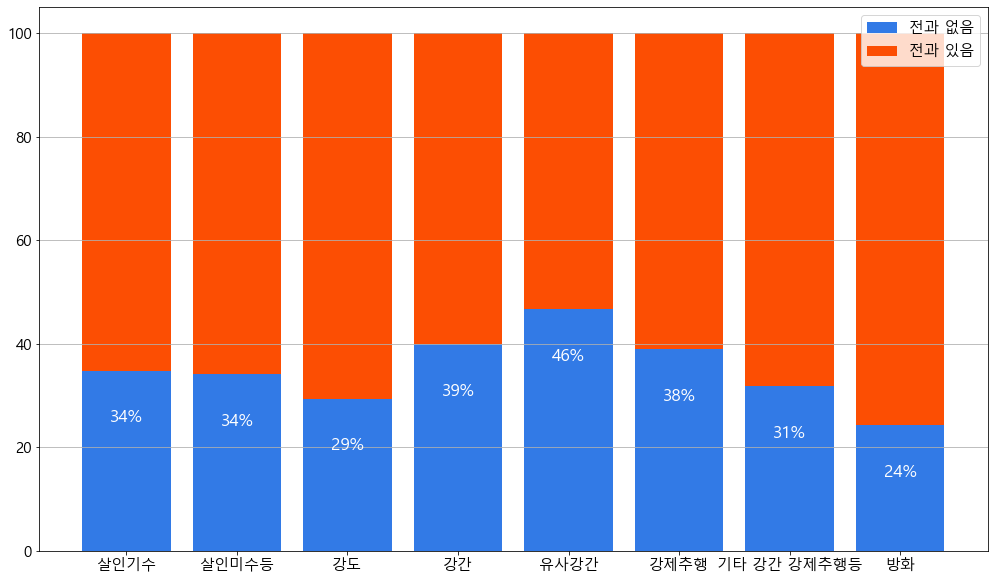

In [130]:
plt.figure(figsize =(17,10))
mpl.rc('font',size=15)

plt.grid(True, axis= 'y')

bar = plt.bar(df6['범죄중분류'],df6['없음']/df6['총인원']*100,label = '전과 없음',color = '#327ae6')
plt.bar(df6['범죄중분류'],df6['전과(소계)']/df6['총인원']*100,bottom =df6['없음']/df6['총인원']*100,label = '전과 있음',color='#fc4e03')

plt.legend()
for idx, rect in enumerate(bar):
    plt.text(idx,rect.get_height()-10,str(df6['없음퍼센트'][idx])+'%',ha ='center',fontsize = 17, color= 'w')

# 분석그래프 7.